<a href="https://colab.research.google.com/github/kairamilanifitria/Bootcamp-NLP/blob/main/Project_1_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Data Cleaning

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', None)

In [7]:
df = pd.read_csv('/content/drive/MyDrive/Bootcamp AI/Dataset/tweet.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
df.head()

,sentimen,tweet
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦"
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ"
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp"
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!"
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak"


In [8]:
! pip install nltk

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sentimen  1815 non-null   object
 1   tweet     1815 non-null   object
dtypes: object(2)
memory usage: 28.5+ KB


In [10]:
# Convert 'tweet' column to string
df['tweet'] = df['tweet'].astype(str)

# Convert 'sentimen' column to categorical type
df['sentimen'] = df['sentimen'].astype('category')


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   sentimen  1815 non-null   category
 1   tweet     1815 non-null   object  
dtypes: category(1), object(1)
memory usage: 16.2+ KB


In [12]:
from nltk.corpus import stopwords
import nltk

# Download the stopwords list if not already downloaded
nltk.download('stopwords')

# Get Indonesian stopwords
stop_words = set(stopwords.words('indonesian')) # Use words instead of get

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
import re

def clean_text(text):
    # Remove URL + lowercase
    text = re.sub(r'#(\w+)', lambda match: ' ' + re.sub(r'(?<=[a-z0-9])(?=[A-Z])', ' ', match.group(1)), text)
    text = text.lower()
    text = re.sub(r'https?://\S+', '', text)
    text = re.sub(r'www\.\S+', '', text)
    text = re.sub(r'pic\.twitter\.com/\S+', '', text)

    # Remove emojis
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)

    # Remove special characters and punctuation
    text = re.sub(r'[^\w\s]', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9\s]', ' ', text)

    # Remove extra whitespace
    text = re.sub(r'\s+', ' ', text).strip()

    return text

# Apply cleaning function to the 'tweet' column
df['tweet_clean'] = df['tweet'].apply(clean_text)


In [14]:
df

,sentimen,tweet,tweet_clean
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",kata prabowo indonesia tidak dihargai bangsa asing berita ini pasti hoax buatan penguasa ya kan rockygerung
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",batuan langka tasbih jokowi hadiah dari habib luthfi seharga mercy
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",di era jokowi ekonomi indonesia semakin baik 01 indonesia maju jokowi lagi jokowi menang total debat
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",bagi sumatera selatan asian games berdampak pd ekonomi langsung diprediksi mencapai 18 5 triliun indonesia maju jokowi hebat
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat terus masyarakatnya ngeluh karena negara ngutang setiap negara itu pasti ngutang utang bisa dibayar kalo negara dapet penghasilan penghasilan negara itu ya dari pajak
...,...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat #2019GantiPresiden,negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat 2019 ganti presiden
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekonomian makin membaik. #PutihkanGBK,1 hrs ceramah di damai indonesiaku 2 perekonomian makin membaik putihkan gbk
1812,netral,Mari bangun bangsa dgn mendukung perekonomian negara bersama Pak Jokowi. Ayo kerja! https://twitter.com/KaskusLoker/status/1111643312241295363Â â€¦,mari bangun bangsa dgn mendukung perekonomian negara bersama pak jokowi ayo kerja
1813,netral,"Bantu majukan perekonomian bangsa bersama Pak Jokowi, yuk! https://twitter.com/BKNSquare/status/1113655944955588610Â â€¦",bantu majukan perekonomian bangsa bersama pak jokowi yuk


In [15]:
def remove_stopwords(text):
    words = text.split()
    words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(words)

# Apply stopwords removal function to the 'tweet' column
df['tweet_clean'] = df['tweet_clean'].apply(remove_stopwords)


In [16]:
df

,sentimen,tweet,tweet_clean
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",prabowo indonesia dihargai bangsa asing berita hoax buatan penguasa ya rockygerung
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",batuan langka tasbih jokowi hadiah habib luthfi seharga mercy
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",era jokowi ekonomi indonesia 01 indonesia maju jokowi jokowi menang total debat
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",sumatera selatan asian games berdampak pd ekonomi langsung diprediksi mencapai 18 5 triliun indonesia maju jokowi hebat
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",negara ngutang bngun infrastruktur udah dipake masyarakat masyarakatnya ngeluh negara ngutang negara ngutang utang dibayar kalo negara dapet penghasilan penghasilan negara ya pajak
...,...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat #2019GantiPresiden,negarawan sejati sll bangga mengedepankan harga bangsanya yg berdaulat 2019 ganti presiden
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekonomian makin membaik. #PutihkanGBK,1 hrs ceramah damai indonesiaku 2 perekonomian membaik putihkan gbk
1812,netral,Mari bangun bangsa dgn mendukung perekonomian negara bersama Pak Jokowi. Ayo kerja! https://twitter.com/KaskusLoker/status/1111643312241295363Â â€¦,mari bangun bangsa dgn mendukung perekonomian negara jokowi ayo kerja
1813,netral,"Bantu majukan perekonomian bangsa bersama Pak Jokowi, yuk! https://twitter.com/BKNSquare/status/1113655944955588610Â â€¦",bantu majukan perekonomian bangsa jokowi yuk


# 2. Text Normalization

## 2.1 Lemmatization : nlp_id

In [20]:
! pip install nlp-id

In [22]:
from nlp_id.lemmatizer import Lemmatizer

def lemmetize_indonesian(text):
    # Create an instance of the stemmer
    lemmatizer = Lemmatizer()
    tokens = text.split()
    # Lemmatize each token
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    # Combine lemmatized tokens back into a single string (if needed)
    lemmatized_text = ' '.join(lemmatized_tokens)
    # Print the original and lemmatized tokens and text
    print("Original Tokens:", tokens)
    print("Lemmatized Tokens:", lemmatized_tokens)
    print("Lemmatized Text:", lemmatized_text)
    return lemmatized_text

df["tweet_clean"] = df['tweet_clean'].apply(lemmetize_indonesian)

Streaming output truncated to the last 5000 lines.
Lemmatized Tokens: ['penting', 'prabowo', 'sandi', 'komitmen', 'turun', 'harga', 'listrik', '900', 'w', 'udah', 'gitu', 'aja', 'dukung', 'si', 'jae', 'ga', 'tuju', 'dukung', 'prabowo', 'sandi', 'tuju', 'aja', 'moga', 'prabowo', 'pimpin', 'tepat', 'janji', 'kampanye', 'ga', 'kayak', 'si', 'jae']
Lemmatized Text: penting prabowo sandi komitmen turun harga listrik 900 w udah gitu aja dukung si jae ga tuju dukung prabowo sandi tuju aja moga prabowo pimpin tepat janji kampanye ga kayak si jae
Original Tokens: ['jokowi', 'warga', 'papua', 'hak', 'rasa', 'harga', 'bbm', 'pulau', 'jawa', 'jkw', 'amin', 'hamterjamin', '01ndonesia', 'maju']
Lemmatized Tokens: ['jokowi', 'warga', 'papua', 'hak', 'rasa', 'harga', 'bbm', 'pulau', 'jawa', 'jkw', 'amin', 'hamterjamin', '01ndonesia', 'maju']
Lemmatized Text: jokowi warga papua hak rasa harga bbm pulau jawa jkw amin hamterjamin 01ndonesia maju
Original Tokens: ['skill', 'anak', 'bangsa', 'harga', 'nega

In [27]:
df

,sentimen,tweet,tweet_clean
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",prabowo indonesia harga bangsa asing berita hoax buat kuasa ya rockygerung
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",batu langka tasbih jokowi hadiah habib luthfi harga mercy
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",era jokowi ekonomi indonesia 01 indonesia maju jokowi jokowi menang total debat
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",sumatera selatan asi games dampak pd ekonomi langsung prediksi capai 18 5 triliun indonesia maju jokowi hebat
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",negara ngutang bngun infrastruktur udah dipake masyarakat masyarakat ngeluh negara ngutang negara ngutang utang bayar kalo negara dapet hasil hasil negara ya pajak
...,...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat #2019GantiPresiden,negarawan sejati sll bangga depan harga bangsa yg daulat 2019 ganti presiden
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekonomian makin membaik. #PutihkanGBK,1 hrs ceramah damai indonesia 2 ekonomi baik putih gbk
1812,netral,Mari bangun bangsa dgn mendukung perekonomian negara bersama Pak Jokowi. Ayo kerja! https://twitter.com/KaskusLoker/status/1111643312241295363Â â€¦,mari bangun bangsa dgn dukung ekonomi negara jokowi ayo kerja
1813,netral,"Bantu majukan perekonomian bangsa bersama Pak Jokowi, yuk! https://twitter.com/BKNSquare/status/1113655944955588610Â â€¦",bantu maju ekonomi bangsa jokowi yuk


In [28]:
# Write csv
file_path = 'text_lemmatize_1.csv'
df.to_csv(file_path, index=False)

## 2.1.b Stemming : Sastrawi

In [17]:
! pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 14.0 MB/s eta 0:00:00


In [18]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.tokenize import word_tokenize

def lemmatization_indonesian(text):
    # Create a stemmer for Indonesian
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    tokens = text.split()

    # Lemmatization for Indonesian
    lemmatized_tokens = [stemmer.stem(token) for token in tokens]
    # Combine lemmatized tokens back into a single string (if needed)
    lemmatized_text = ' '.join(lemmatized_tokens)
    # Print the original and lemmatized tokens and text
    print("Original Tokens:", tokens)
    print("Lemmatized Tokens:", lemmatized_tokens)
    print("Lemmatized Text:", lemmatized_text)
    return lemmatized_text

df["tweet_clean"] = df['tweet_clean'].apply(lemmatization_indonesian)


Streaming output truncated to the last 5000 lines.
Lemmatized Tokens: ['penting', 'prabowo', 'sandi', 'komitmen', 'turun', 'harga', 'listrik', '900', 'w', 'udah', 'gitu', 'aja', 'dukung', 'si', 'jae', 'ga', 'tuju', 'dukung', 'prabowo', 'sandi', 'tuju', 'aja', 'moga', 'prabowo', 'pimpin', 'tepat', 'janji', 'kampanye', 'ga', 'kayak', 'si', 'jae']
Lemmatized Text: penting prabowo sandi komitmen turun harga listrik 900 w udah gitu aja dukung si jae ga tuju dukung prabowo sandi tuju aja moga prabowo pimpin tepat janji kampanye ga kayak si jae
Original Tokens: ['jokowi', 'warga', 'papua', 'berhak', 'merasakan', 'harga', 'bbm', 'pulau', 'jawa', 'jkw', 'amin', 'hamterjamin', '01ndonesia', 'maju']
Lemmatized Tokens: ['jokowi', 'warga', 'papua', 'hak', 'rasa', 'harga', 'bbm', 'pulau', 'jawa', 'jkw', 'amin', 'hamterjamin', '01ndonesia', 'maju']
Lemmatized Text: jokowi warga papua hak rasa harga bbm pulau jawa jkw amin hamterjamin 01ndonesia maju
Original Tokens: ['skill', 'anak', 'bangsa', 'dihar

In [22]:
df

,sentimen,tweet,tweet_clean
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",prabowo indonesia harga bangsa asing berita hoax buat kuasa ya rockygerung
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",batu langka tasbih jokowi hadiah habib luthfi harga mercy
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",era jokowi ekonomi indonesia 01 indonesia maju jokowi jokowi menang total debat
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",sumatera selatan asi games dampak pd ekonomi langsung prediksi capai 18 5 triliun indonesia maju jokowi hebat
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",negara ngutang bngun infrastruktur udah dipake masyarakat masyarakat ngeluh negara ngutang negara ngutang utang bayar kalo negara dapet hasil hasil negara ya pajak
...,...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat #2019GantiPresiden,negarawan sejati sll bangga depan harga bangsa yg daulat 2019 ganti presiden
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekonomian makin membaik. #PutihkanGBK,1 hrs ceramah damai indonesia 2 ekonomi baik putih gbk
1812,netral,Mari bangun bangsa dgn mendukung perekonomian negara bersama Pak Jokowi. Ayo kerja! https://twitter.com/KaskusLoker/status/1111643312241295363Â â€¦,mari bangun bangsa dgn dukung ekonomi negara jokowi ayo kerja
1813,netral,"Bantu majukan perekonomian bangsa bersama Pak Jokowi, yuk! https://twitter.com/BKNSquare/status/1113655944955588610Â â€¦",bantu maju ekonomi bangsa jokowi yuk


In [23]:
# Write csv
file_path = 'text_lemmatize_2_sastrawi.csv'
df.to_csv(file_path, index=False)

## 2.2.a Vectorization : CountVectorizer

In [1]:
!pip install scikit-learn
!pip install nlp_id

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.1/8.1 MB 109.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 402.6/402.6 kB 31.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 72.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 116.7 MB/s eta 0:00:00
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9656 sha256=5e123e6cb4df7c3059c87f88d4b3ced84c95d87ddd60553a7081eaacf122c501
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget
  Attempting uninstall: nltk
    Found existing installation: nltk 3.8.1
    Uninstalling nltk-3.8.1:
      Successfully uninstalled nltk-3.8.1
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2
  Attempting uninstall: huggingface-hub
    Found

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

In [5]:
# pakai data hasil lemmatization dengan nlp_id
df = pd.read_csv('/content/drive/MyDrive/Bootcamp AI/Dataset/Task1 : Sentiment Analysis /text_lemmatize_1.csv')
df

,sentimen,tweet,tweet_clean
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",prabowo indonesia harga bangsa asing berita hoax buat kuasa ya rockygerung
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",batu langka tasbih jokowi hadiah habib luthfi harga mercy
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",era jokowi ekonomi indonesia 01 indonesia maju jokowi jokowi menang total debat
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",sumatera selatan asi games dampak pd ekonomi langsung prediksi capai 18 5 triliun indonesia maju jokowi hebat
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",negara ngutang bngun infrastruktur udah dipake masyarakat masyarakat ngeluh negara ngutang negara ngutang utang bayar kalo negara dapet hasil hasil negara ya pajak
...,...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat #2019GantiPresiden,negarawan sejati sll bangga depan harga bangsa yg daulat 2019 ganti presiden
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekonomian makin membaik. #PutihkanGBK,1 hrs ceramah damai indonesia 2 ekonomi baik putih gbk
1812,netral,Mari bangun bangsa dgn mendukung perekonomian negara bersama Pak Jokowi. Ayo kerja! https://twitter.com/KaskusLoker/status/1111643312241295363Â â€¦,mari bangun bangsa dgn dukung ekonomi negara jokowi ayo kerja
1813,netral,"Bantu majukan perekonomian bangsa bersama Pak Jokowi, yuk! https://twitter.com/BKNSquare/status/1113655944955588610Â â€¦",bantu maju ekonomi bangsa jokowi yuk


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

# Assuming you have already lemmatized your text
lemmatized_texts = df['tweet_clean']

# Initialize CountVectorizer
vectorizer = CountVectorizer()

# Fit and transform the lemmatized text
X = vectorizer.fit_transform(lemmatized_texts)

# Convert to array if you want to see the result in array format
vectorized_array = X.toarray()

# Get feature names (vocabulary terms)
feature_names = vectorizer.get_feature_names_out()

# Display the vectorized text and feature names
print("Feature Names:", feature_names)
print("Vectorized Array:\n", vectorized_array)

Feature Names: ['000' '01' '01ndonesia' ... 'zippo' 'zon' 'zonk']
Vectorized Array:
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [11]:
vectorizer.vocabulary_

{'prabowo': 3943,
 'indonesia': 1902,
 'harga': 1736,
 'bangsa': 499,
 'asing': 400,
 'berita': 630,
 'hoax': 1809,
 'buat': 813,
 'kuasa': 2571,
 'ya': 5341,
 'rockygerung': 4203,
 'batu': 544,
 'langka': 2641,
 'tasbih': 4831,
 'jokowi': 2131,
 'hadiah': 1702,
 'habib': 1692,
 'luthfi': 2780,
 'mercy': 3047,
 'era': 1389,
 'ekonomi': 1341,
 '01': 1,
 'maju': 2815,
 'menang': 3003,
 'total': 5020,
 'debat': 1062,
 'sumatera': 4710,
 'selatan': 4414,
 'asi': 397,
 'games': 1530,
 'dampak': 1035,
 'pd': 3713,
 'langsung': 2643,
 'prediksi': 3964,
 'capai': 879,
 '18': 31,
 'triliun': 5049,
 'hebat': 1759,
 'negara': 3297,
 'ngutang': 3420,
 'bngun': 739,
 'infrastruktur': 1924,
 'udah': 5144,
 'dipake': 1182,
 'masyarakat': 2936,
 'ngeluh': 3369,
 'utang': 5213,
 'bayar': 553,
 'kalo': 2211,
 'dapet': 1040,
 'hasil': 1750,
 'pajak': 3618,
 'yg': 5370,
 'bisikin': 709,
 'cm': 960,
 'mikirin': 3074,
 'putar': 4057,
 'duit': 1299,
 'golong': 1646,
 'sports': 4640,
 'dr': 1273,
 'sekian': 4

## 2.2.b Vectorization : TF-IDF

## 2.2.c Vectorization : Word2Vec

## 2.2.d Vectorization : BERT - RoBERTa

## 2.2.e Vectorization : GPT

# 3. Modelling


## 3.1 Random Forest - Hyperparameter Tuning

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Corresponding sentiment labels (replace with your actual labels)
# 'neutral' = 1, 'positive' = 2, 'negative' = 0
sentiment_labels = df['sentimen']

# Convert sentiment labels to numeric format
label_mapping = {'negatif': 0, 'netral': 1, 'positif': 2}
numeric_labels = [label_mapping[label] for label in sentiment_labels]

# Split the vectorized data and labels into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(vectorized_array, numeric_labels, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (1452, 5402)
X_test shape: (363, 5402)


In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Define the Random Forest model
rf = RandomForestClassifier(random_state=42)

# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],          # Number of trees
    'max_depth': [None, 10, 20, 30],         # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],         # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],           # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]               # Whether bootstrap samples are used when building trees
}

# Step 5: Initialize GridSearchCV with Random Forest and the parameter grid
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

# Step 6: Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Step 7: Get the best parameters and best model
print("Best Parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Parameters: {'bootstrap': False, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


Accuracy: 0.6446280991735537
Classification Report:
               precision    recall  f1-score   support

    negative       0.63      0.74      0.68       115
     neutral       0.62      0.68      0.65       118
    positive       0.69      0.53      0.60       130

    accuracy                           0.64       363
   macro avg       0.65      0.65      0.64       363
weighted avg       0.65      0.64      0.64       363

Confusion Matrix:
 [[85 17 13]
 [20 80 18]
 [29 32 69]]


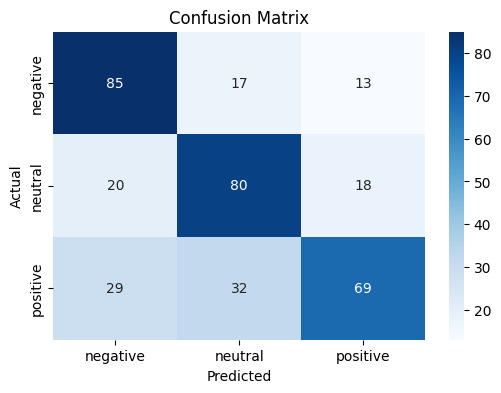

In [18]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Evaluate the tuned Random Forest on the test data
y_pred = best_rf.predict(X_test)

# Print classification report and accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=['negative', 'neutral', 'positive']))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Visualize the confusion matrix using seaborn heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['negative', 'neutral', 'positive'], yticklabels=['negative', 'neutral', 'positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 3.2 LSTM - Hyperparameter Tuning

In [20]:
!pip install keras-tuner --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 8.6 MB/s eta 0:00:00


In [29]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import keras_tuner as kt

In [30]:
# Corresponding sentiment labels
sentiment_labels = df['sentimen']

# Convert sentiment labels to numeric format using LabelEncoder
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(sentiment_labels)
numeric_labels = to_categorical(numeric_labels)  # One-hot encoding for LSTM


# Tokenization and Padding
tokenizer = Tokenizer(num_words=5000, oov_token="<OOV>")
tokenizer.fit_on_texts(lemmatized_texts)
sequences = tokenizer.texts_to_sequences(lemmatized_texts)

# Padding sequences to ensure all sequences are of the same length
max_sequence_length = 10  # Can be adjusted depending on your text length
X = pad_sequences(sequences, maxlen=max_sequence_length, padding='post')


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, numeric_labels, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (1452, 10)
X_test shape: (363, 10)


In [31]:
# Define the model-building function for KerasTuner
def build_model(hp):
    model = Sequential()
    model.add(Embedding(input_dim=5000, output_dim=hp.Int('embedding_dim', min_value=32, max_value=128, step=32), input_length=max_sequence_length))
    model.add(LSTM(hp.Int('lstm_units', min_value=64, max_value=256, step=64), return_sequences=False))
    model.add(Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(3, activation='softmax'))

    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Initialize KerasTuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    project_name='sentiment_analysis'
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [32]:
# Run the hyperparameter search
tuner.search(X_train, y_train, epochs=10, validation_split=0.2)

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]


Trial 5 Complete [00h 00m 06s]
val_accuracy: 0.5807560086250305

Best val_accuracy So Far: 0.6082473993301392
Total elapsed time: 00h 00m 36s


/usr/local/lib/python3.10/dist-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 2 variables whereas the saved optimizer has 8 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step
Accuracy Score: 0.5152
Classification Report:
               precision    recall  f1-score   support

     negatif       0.46      0.55      0.50       115
      netral       0.52      0.58      0.55       118
     positif       0.59      0.43      0.50       130

    accuracy                           0.52       363
   macro avg       0.52      0.52      0.51       363
weighted avg       0.53      0.52      0.51       363



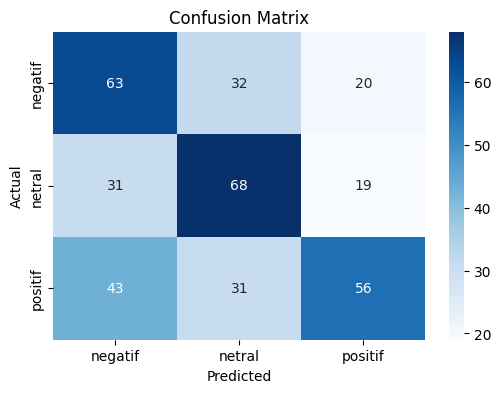

In [33]:
# Evaluate the model
y_pred = best_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Accuracy Score
accuracy = accuracy_score(y_test_classes, y_pred_classes)
print(f"Accuracy Score: {accuracy:.4f}")

# Classification Report
print("Classification Report:\n", classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test_classes, y_pred_classes)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

## 3.3 (Additional Model)

### DRAFT CODE

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import gensim.downloader as gensim_api
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import transformers
import torch
import keras_tuner as kt
import seaborn as sns
import matplotlib.pyplot as plt

# Example lemmatized text data (replace with your actual lemmatized text)
lemmatized_texts = [
    "saya sedang membaca buku di perpustakaan",
    "dia pergi ke pasar untuk membeli buah",
    "saya merasa sangat bahagia hari ini",
    "cuaca hari ini buruk sekali",
    "mereka berdebat karena salah paham"
]

# Corresponding sentiment labels
sentiment_labels = ['neutral', 'negative', 'positive', 'negative', 'neutral']

# Convert sentiment labels to numeric format using LabelEncoder
label_encoder = LabelEncoder()
numeric_labels = label_encoder.fit_transform(sentiment_labels)
numeric_labels = to_categorical(numeric_labels)  # One-hot encoding for LSTM

# Train-Test Split
X_train_text, X_test_text, y_train, y_test = train_test_split(lemmatized_texts, numeric_labels, test_size=0.2, random_state=42)

# Vectorization Techniques

# 1. CountVectorizer
def vectorize_countvectorizer(train_texts, test_texts):
    vectorizer = CountVectorizer()
    X_train = vectorizer.fit_transform(train_texts)
    X_test = vectorizer.transform(test_texts)
    return X_train, X_test

# 2. TF-IDF Vectorizer
def vectorize_tfidf(train_texts, test_texts):
    vectorizer = TfidfVectorizer()
    X_train = vectorizer.fit_transform(train_texts)
    X_test = vectorizer.transform(test_texts)
    return X_train, X_test

# 3. Word2Vec Vectorization
def vectorize_word2vec(train_texts, test_texts):
    # Load pre-trained Word2Vec model
    model = gensim_api.load("word2vec-google-news-300")

    def average_word2vec(tokens_list, model, vocabulary):
        vectors = [model[w] for w in tokens_list if w in vocabulary]
        return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

    X_train = np.array([average_word2vec(text.split(), model, model.key_to_index) for text in train_texts])
    X_test = np.array([average_word2vec(text.split(), model, model.key_to_index) for text in test_texts])

    return X_train, X_test

# 4. BERT Vectorization
def vectorize_bert(train_texts, test_texts):
    tokenizer = transformers.BertTokenizer.from_pretrained('bert-base-uncased')
    model = transformers.TFBertModel.from_pretrained('bert-base-uncased')

    def encode(texts):
        inputs = tokenizer(texts, return_tensors='tf', padding=True, truncation=True)
        outputs = model(inputs)
        return outputs.last_hidden_state[:, 0, :].numpy()  # Take [CLS] token output

    X_train = encode(train_texts)
    X_test = encode(test_texts)

    return X_train, X_test

# 5. RoBERTa Vectorization
def vectorize_roberta(train_texts, test_texts):
    tokenizer = transformers.RobertaTokenizer.from_pretrained('roberta-base')
    model = transformers.TFRobertaModel.from_pretrained('roberta-base')

    def encode(texts):
        inputs = tokenizer(texts, return_tensors='tf', padding=True, truncation=True)
        outputs = model(inputs)
        return outputs.last_hidden_state[:, 0, :].numpy()  # Take [CLS] token output

    X_train = encode(train_texts)
    X_test = encode(test_texts)

    return X_train, X_test

# 6. GPT Vectorization (Using GPT-2)
def vectorize_gpt(train_texts, test_texts):
    tokenizer = transformers.GPT2Tokenizer.from_pretrained('gpt2')
    model = transformers.TFGPT2Model.from_pretrained('gpt2')

    def encode(texts):
        inputs = tokenizer(texts, return_tensors='tf', padding=True, truncation=True)
        outputs = model(inputs)
        return outputs.last_hidden_state[:, 0, :].numpy()  # Take [CLS] token output

    X_train = encode(train_texts)
    X_test = encode(test_texts)

    return X_train, X_test

# Random Forest Model
def random_forest_model(X_train, X_test, y_train, y_test):
    rf_pipeline = Pipeline([
        ('clf', RandomForestClassifier())
    ])

    param_grid = {
        'clf__n_estimators': [50, 100, 200],
        'clf__max_depth': [10, 20, 30],
        'clf__min_samples_split': [2, 5, 10]
    }

    grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Metrics
    print("Random Forest - Classification Report:\n", classification_report(np.argmax(y_test, axis=1), y_pred, target_names=label_encoder.classes_))
    print("Random Forest - Accuracy Score:", accuracy_score(np.argmax(y_test, axis=1), y_pred))
    cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title('Random Forest - Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# LSTM Model
def lstm_model(X_train, X_test, y_train, y_test, hp):
    model = Sequential()
    model.add(Embedding(input_dim=X_train.shape[1], output_dim=hp.Int('embedding_dim', min_value=32, max_value=128, step=32), input_length=X_train.shape[1]))
    model.add(LSTM(hp.Int('lstm_units', min_value=64, max_value=256, step=64), return_sequences=False))
    model.add(Dropout(hp.Float('dropout', min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(3, activation='softmax'))

    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

def tune_and_evaluate_lstm(X_train, X_test, y_train, y_test):
    tuner = kt.RandomSearch(
        lambda hp: lstm_model(X_train, X_test, y_train, y_test, hp),
        objective='val_accuracy',
        max_trials=5,
        executions_per_trial=1,
        directory='my_dir',
        project_name='sentiment_analysis'
    )

    tuner.search(X_train, y_train, epochs=10, validation_split=0.2)
    best_model = tuner.get_best_models(num_models=1)[0]

    y_pred = best_model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)

    # Metrics
    print("LSTM - Classification Report:\n", classification_report(y_test_classes, y_pred_classes, target_names=label_encoder.classes_))
    print("LSTM - Accuracy Score:", accuracy_score(y_test_classes, y_pred_classes))
    cm = confusion_matrix(y_test_classes, y_pred_classes)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
    plt.title('LSTM - Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Usage
# For each vectorization technique, use the appropriate function to vectorize data and then pass it to the models.

# Example with CountVectorizer
X_train, X_test = vectorize_countvectorizer(X_train_text, X_test_text)
random_forest_model(X_train, X_test, np.argmax(y_train, axis=1), np.argmax(y_test, axis=1))


# 4. Testing & Evaluation

In [ ]:
display(df)

# Write csv
file_path = 'text_cleaned.csv'
df.to_csv(file_path, index=False)

,sentimen,tweet,tweet_clean
0,negatif,"Kata @prabowo Indonesia tidak dihargai bangsa asing! Berita ini ðŸ‘‡ pasti hoax buatan penguasa, ya kan @rockygerung?ðŸ˜œ https://twitter.com/mediaindonesia/status/1117575436337160192?s=21Â â€¦",prabowo indonesia harga bangsa asing berita hoax buat kuasa ya rockygerung
1,netral,"Batuan Langka, Tasbih Jokowi Hadiah dari Habib Luthfi Seharga Mercy? http://dlvr.it/R2pvZVÂ",batu langka tasbih jokowi hadiah habib luthfi harga mercy
2,netral,"Di era Jokowi, ekonomi Indonesia semakin baik. #01IndonesiaMaju #JokowiLagi #JokowiMenangTotalDebat pic.twitter.com/W2ythnxsTp",era jokowi ekonomi indonesia 01 indonesia maju jokowi jokowi menang total debat
3,positif,"Bagi Sumatera Selatan, Asian Games berdampak pd ekonomi langsung diprediksi mencapai 18,5 triliun. Indonesia maju, Jokowi hebat!",sumatera selatan asi games dampak pd ekonomi langsung prediksi capai 18 5 triliun indonesia maju jokowi hebat
4,negatif,"Negara kita ngutang buat bngun infrastruktur yang udah dipake masyarakat, terus masyarakatnya ngeluh karena negara ngutang, setiap negara itu pasti ngutang, utang bisa dibayar kalo negara dapet penghasilan. Penghasilan negara itu ya dari pajak",negara ngutang bngun infrastruktur udah dipake masyarakat masyarakat ngeluh negara ngutang negara ngutang utang bayar kalo negara dapet hasil hasil negara ya pajak
...,...,...,...
1810,netral,Negarawan sejati sll bangga dan mengedepankan harga diri bangsanya yg berdaulat #2019GantiPresiden,negarawan sejati sll bangga depan harga bangsa yg daulat 2019 ganti presiden
1811,netral,1. HRS ceramah di Damai Indonesiaku 2. Perekonomian makin membaik. #PutihkanGBK,1 hrs ceramah damai indonesia 2 ekonomi baik putih gbk
1812,netral,Mari bangun bangsa dgn mendukung perekonomian negara bersama Pak Jokowi. Ayo kerja! https://twitter.com/KaskusLoker/status/1111643312241295363Â â€¦,mari bangun bangsa dgn dukung ekonomi negara jokowi ayo kerja
1813,netral,"Bantu majukan perekonomian bangsa bersama Pak Jokowi, yuk! https://twitter.com/BKNSquare/status/1113655944955588610Â â€¦",bantu maju ekonomi bangsa jokowi yuk
